In [114]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [115]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM
using KernelDensity

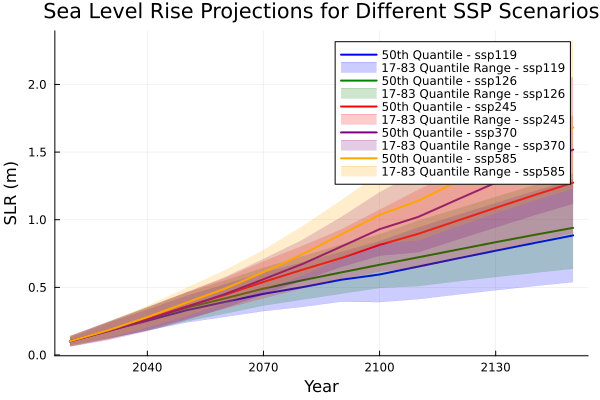

In [116]:
# get slr data
slr = DataFrame(XLSX.readtable("data/ipcc_ar6_sea_level_projection_psmsl_id_12.xlsx", "Total"))

# years range
years = 2020:10:2150

# unique scenarios
scenarios = ["ssp119", "ssp126", "ssp245", "ssp370", "ssp585"]

colors = [:blue, :green, :red, :purple, :orange]

# plotting
p = plot(xlabel="Year", ylabel="SLR (m)", title="Sea Level Rise Projections for Different SSP Scenarios")

# Loop through each scenario and plot the data
for (i, scenario) in enumerate(scenarios)
    # Filter data for 17th, 50th, and 83rd quantiles for the current scenario
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    # Extract the sea level data for the 17th, 50th, and 83rd quantiles
    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    # Plot the 50th quantile
    plot!(p, years, sea_levels_50, label="50th Quantile - $scenario", color=colors[i], lw=2)

    # Plot the shaded area between the 17th and 83rd quantiles
    plot!(p, years, sea_levels_25, fillrange=sea_levels_75, label="17-83 Quantile Range - $scenario", color=colors[i], lw=0, fillalpha=0.2)
end

# Display the plot
display(p)


In [117]:
years_all = []
scenarios_all = []
quantile_17_all = []
quantile_50_all = []
quantile_83_all = []

# Loop through each scenario and collect the data for each quantile
for scenario in scenarios
    data_25 = filter(row -> row.scenario == scenario && row.quantile == 17, slr)
    data_50 = filter(row -> row.scenario == scenario && row.quantile == 50, slr)
    data_75 = filter(row -> row.scenario == scenario && row.quantile == 83, slr)

    sea_levels_25 = Vector{Float64}(data_25[1, Symbol.(string.(years))])
    sea_levels_50 = Vector{Float64}(data_50[1, Symbol.(string.(years))])
    sea_levels_75 = Vector{Float64}(data_75[1, Symbol.(string.(years))])

    append!(years_all, years)
    append!(scenarios_all, fill(scenario, length(years)))
    append!(quantile_17_all, sea_levels_25)
    append!(quantile_50_all, sea_levels_50)
    append!(quantile_83_all, sea_levels_75)
end

# Create the DataFrame
slr_df = DataFrame(
    Year = years_all,
    Scenario = scenarios_all,
    Quantile_17 = quantile_17_all,
    Quantile_50 = quantile_50_all,
    Quantile_83 = quantile_83_all
)

println(slr_df)

70×5 DataFrame
 Row │ Year  Scenario  Quantile_17  Quantile_50  Quantile_83 
     │ Any   Any       Any          Any          Any         
─────┼───────────────────────────────────────────────────────
   1 │ 2020  ssp119    0.074        0.1          0.13
   2 │ 2030  ssp119    0.126        0.18         0.241
   3 │ 2040  ssp119    0.181        0.253        0.336
   4 │ 2050  ssp119    0.24         0.33         0.437
   5 │ 2060  ssp119    0.282        0.392        0.524
   6 │ 2070  ssp119    0.325        0.452        0.61
   7 │ 2080  ssp119    0.356        0.501        0.685
   8 │ 2090  ssp119    0.394        0.556        0.763
   9 │ 2100  ssp119    0.391        0.595        0.843
  10 │ 2110  ssp119    0.413        0.654        0.944
  11 │ 2120  ssp119    0.447        0.713        1.035
  12 │ 2130  ssp119    0.479        0.771        1.124
  13 │ 2140  ssp119    0.51         0.828        1.213
  14 │ 2150  ssp119    0.539        0.884        1.301
  15 │ 2020  ssp126    0.065   

In [118]:
distributions = []

for row in eachrow(slr_df)
    μ = row.Quantile_50
    σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
    push!(distributions, Normal(μ, σ))
end


In [119]:
println(distributions)

Any[Normal{Float64}(μ=0.1, σ=0.02935010482180294), Normal{Float64}(μ=0.18, σ=0.06027253668763102), Normal{Float64}(μ=0.253, σ=0.08123689727463314), Normal{Float64}(μ=0.33, σ=0.10324947589098533), Normal{Float64}(μ=0.392, σ=0.1268343815513627), Normal{Float64}(μ=0.452, σ=0.14937106918238993), Normal{Float64}(μ=0.501, σ=0.17243186582809228), Normal{Float64}(μ=0.556, σ=0.19339622641509435), Normal{Float64}(μ=0.595, σ=0.23689727463312368), Normal{Float64}(μ=0.654, σ=0.2783018867924528), Normal{Float64}(μ=0.713, σ=0.30817610062893075), Normal{Float64}(μ=0.771, σ=0.3380503144654089), Normal{Float64}(μ=0.828, σ=0.3684486373165619), Normal{Float64}(μ=0.884, σ=0.3993710691823899), Normal{Float64}(μ=0.101, σ=0.039308176100628936), Normal{Float64}(μ=0.182, σ=0.06656184486373166), Normal{Float64}(μ=0.264, σ=0.09067085953878407), Normal{Float64}(μ=0.348, σ=0.11058700209643607), Normal{Float64}(μ=0.418, σ=0.1284067085953879), Normal{Float64}(μ=0.491, σ=0.1467505241090147), Normal{Float64}(μ=0.552, σ

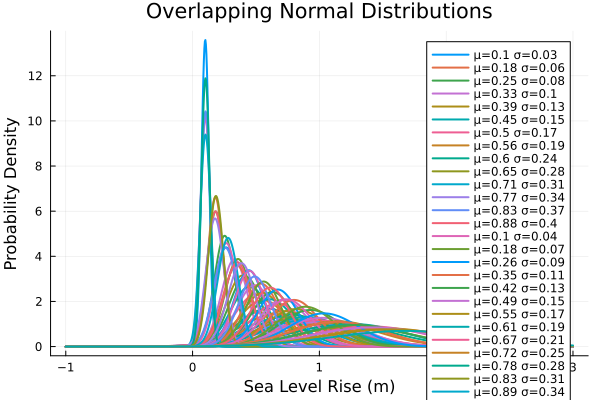

In [120]:
# chat does all of them idk
using Plots
using Distributions

# Create a plot object
p = plot(title="Overlapping Normal Distributions", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

# Define a range for the x-axis
x = range(-1, 3, length=1000)  # Adjust based on expected sea level range

# Loop through distributions and plot their PDFs
for dist in distributions
    # Compute PDF values for each x point
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    # Plot the PDF
    plot!(p, x, pdf_values, lw=2, label="μ=$(round(mean(dist), digits=2)) σ=$(round(std(dist), digits=2))")
end

# Display the plot
display(p)


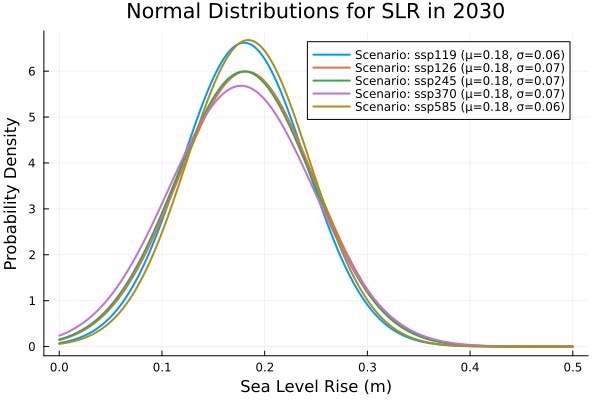

In [121]:
# try year 2030
slr_df_2030 = filter(row -> row.Year == 2030, slr_df)

distributions_2030 = []
for row in eachrow(slr_df_2030)
    μ = row.Quantile_50
    σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
    push!(distributions_2030, Normal(μ, σ))
end


p = plot(title="Normal Distributions for SLR in 2030", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

x = range(0.0, 0.5, length=1000) 


for (i, dist) in enumerate(distributions_2030)
    pdf_values = [Distributions.pdf(dist, xi) for xi in x]
    scenario = slr_df_2030[i, :Scenario]  # Get scenario label
    plot!(p, x, pdf_values, lw=2, label="Scenario: $scenario (μ=$(round(mean(dist), digits=2)), σ=$(round(std(dist), digits=2)))")
end

display(p)


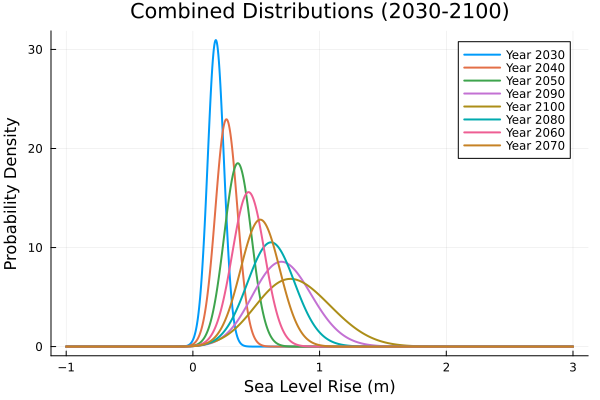

In [122]:
# here edit weights per scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        combined_pdf .+= weights[scenario] * [Distributions.pdf(dist, xi) for xi in x]
    end

    # combined_pdf ./= sum(combined_pdf) * (x[2] - x[1]) # normalizing pdf

    combined_distributions[year] = combined_pdf
end

p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


In [123]:
# trying something else
println(maximum(combined_distributions[2030]))

30.943431817164793


# let me here try to sample to build out MSL over time

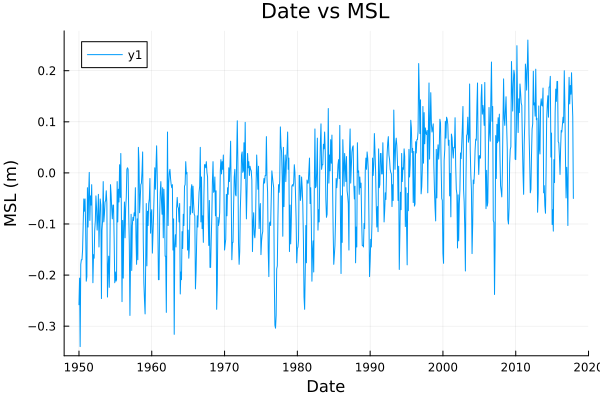

In [133]:
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)

history.Date = Date.(history.Date, "yyyy/mm/dd")  

plot(history.Date, history."MSL (m)", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL", 
    xticks=(collect(Date(1950, 1, 1):Year(10):Date(2020, 1, 1)), string.(1950:10:2020)))


In [134]:

Random.seed!(1)

simulations = 1000
expected_values = []

# Loop through each year and its distribution
for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)


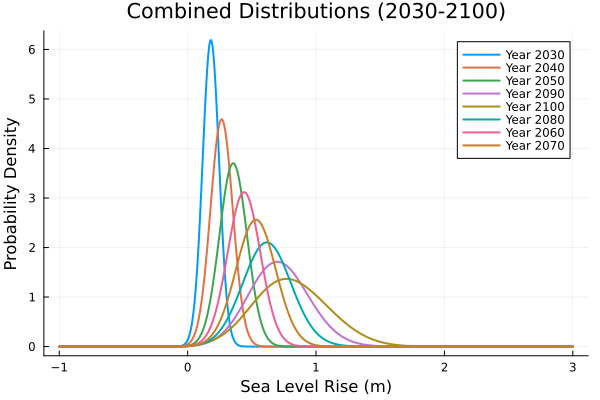

In [135]:
Random.seed!(1)

# Weights for each scenario
weights = Dict("ssp119" => 1.0, "ssp126" => 1.0, "ssp245" => 1.0, "ssp370" => 1.0, "ssp585" => 1.0)

years = 2030:10:2100

x = range(-1, 3, length=1000) 

combined_distributions = Dict()

# Generate combined PDFs for each year
for year in years
    slr_df_year = filter(row -> row.Year == year, slr_df)

    combined_pdf = zeros(length(x))
    
    for row in eachrow(slr_df_year)
        scenario = row.Scenario
        μ = row.Quantile_50
        σ = (row.Quantile_83 - row.Quantile_17) / (2 * 0.954)
        dist = Normal(μ, σ)

        # Calculate the PDF for this distribution at all x points
        pdf_values = [Distributions.pdf(dist, xi) for xi in x]
        
        # Normalize the individual PDF (so that it sums to 1)
        pdf_values ./= sum(pdf_values) * (x[2] - x[1])
        
        # Apply the weight and add to the combined PDF
        combined_pdf .+= weights[scenario] * pdf_values
    end
    
    # Normalize the combined PDF for the year
    combined_pdf ./= sum(combined_pdf) * (x[2] - x[1])  # Normalize to ensure total sum is 1

    combined_distributions[year] = combined_pdf
end

# Plot the combined distributions
p = plot(title="Combined Distributions (2030-2100)", xlabel="Sea Level Rise (m)", ylabel="Probability Density")

for (year, pdf) in combined_distributions
    plot!(p, x, pdf, lw=2, label="Year $year")
end

display(p)


**nothing is working from here below**

In [136]:

# Now, simulate the sea level rise for each year (Monte Carlo simulation)
simulations = 1000
expected_values = []

for (year, pdf) in combined_distributions
    yearly_expected_values = []
    
    for i in 1:simulations
        # Get the PDF for the year
        slr_dist = Normal(pdf[1], pdf[2])  
        
        # Sample a value from the distribution
        slr_sample = rand(slr_dist)
        push!(yearly_expected_values, slr_sample)
    end
    
    # Store the average (expected value) of the simulations
    push!(expected_values, mean(yearly_expected_values))
end

# Combine the results with the years from `slr_df`
expected_slr_df = DataFrame(Year = years, MSL = expected_values)

# Display the final DataFrame
println(expected_slr_df)
